<a href="https://colab.research.google.com/github/Drnjenkins/praxis-2023/blob/main/38-Report_Classification_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# !pip install tabulate
from tabulate import tabulate

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("labeled_foi_text_2023_05_01 (1).csv") # load the dataset

In [ ]:
df.head() # show top 5 rows

,ROW_ID,FOI_TEXT,PRIMARY_LABEL
0,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,Quality Engineering
1,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering
2,2609625,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,Quality Engineering
3,2813837,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering
4,1337517,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering


In [ ]:
print("Total Rows:", df.shape[0]) # check the shape of dataset
print("Total Columns:", df.shape[1])

Total Rows: 5692
Total Columns: 3


In [ ]:
print("Features: {}".format(df.columns.tolist())) # check the columns names inside the dataset

Features: ['ROW_ID', 'FOI_TEXT', 'PRIMARY_LABEL']


In [ ]:
print("Any Duplicated Values: {}".format(df.duplicated().any())) # check duplicated values

Any Duplicated Values: False


In [ ]:
df.info() # get general information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5692 entries, 0 to 5691
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ROW_ID         5692 non-null   int64 
 1   FOI_TEXT       5692 non-null   object
 2   PRIMARY_LABEL  5692 non-null   object
dtypes: int64(1), object(2)
memory usage: 133.5+ KB


In [ ]:
df.isnull().sum() # check missing values

ROW_ID           0
FOI_TEXT         0
PRIMARY_LABEL    0
dtype: int64

In [ ]:
def target_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    ax = df_final[col].value_counts().plot(kind = 'bar', color = ['blue', 'green', 'red', 
                                                                  'purple', 'orange'])

    plt.xlabel('Score Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.title('Frequency Distribution of Target', fontsize=18)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01), size=15)


    plt.subplot(1,2,2)

    df_final[col].value_counts().plot.pie(explode=[0.,0.1,0.1,0.1,0.5],autopct='%1.2f%%',shadow=False, colors = ['blue', 'green', 'red', 
                                                                                              'purple', 'orange'],
                                        textprops={'fontsize':15, 'color':'black'},
                                         startangle=20)
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.show()

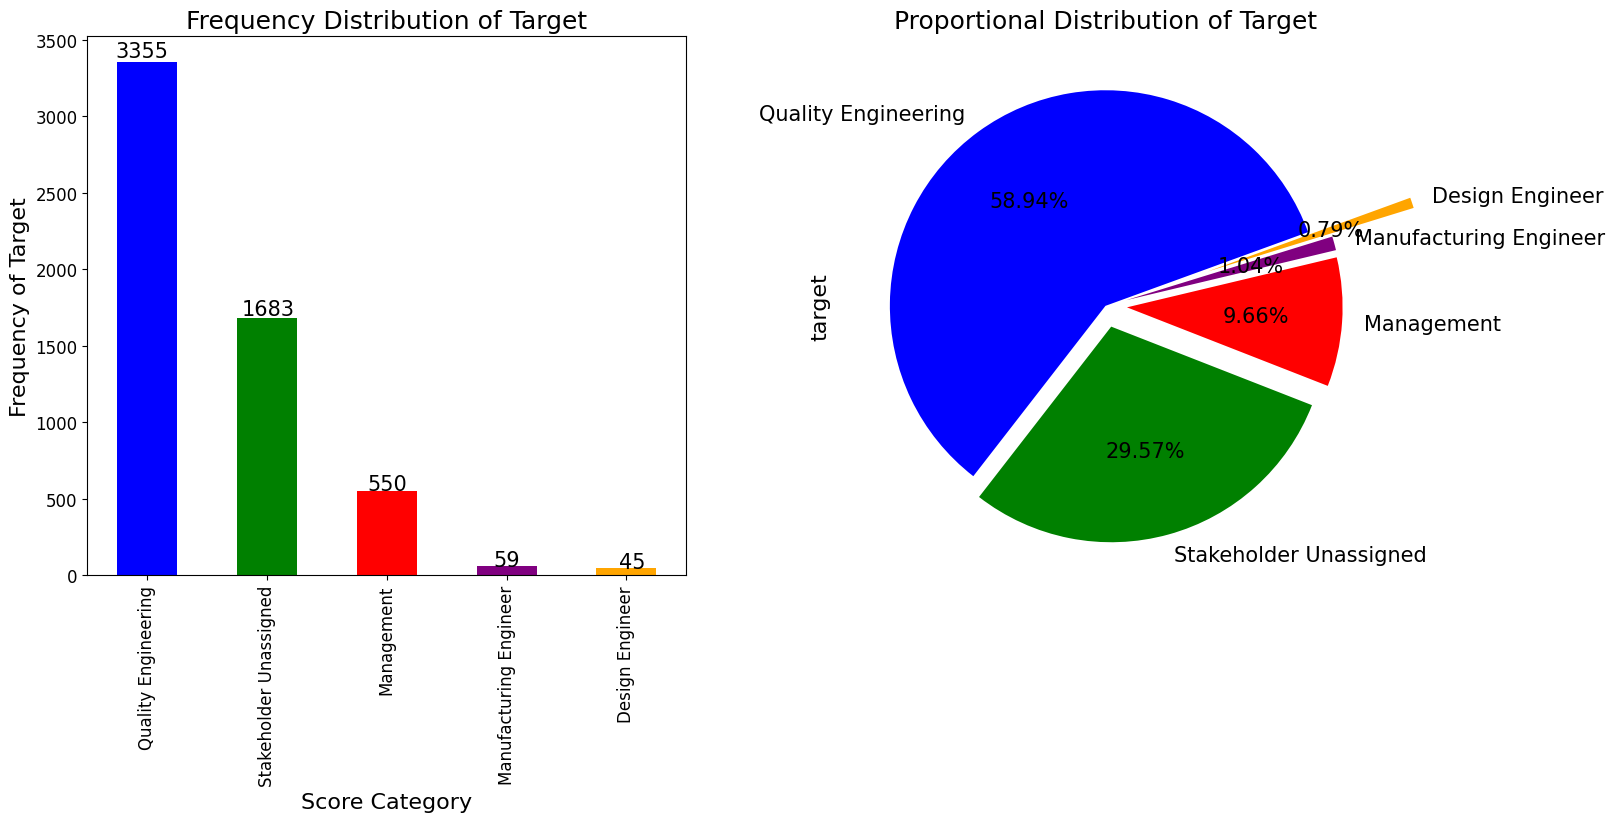

In [ ]:
target_distribution(df, 'PRIMARY_LABEL')

- From above, we can see the distribution of results in which our target feature is in imbalanced form.
- Clearly, we can see that our dataset is imbalanced form. Therefore, accuracy evaluation is not good when the dataset is in an imbalanced form, accuracy is biased on the majority class.
- We will check the different performance metrics Precision, Recall, and F1-score on testing data and see how models perform according to these performance metrics.

In [ ]:
df['text_length'] = df['FOI_TEXT'].apply(lambda x: len(x.split())) # get the length of text
df.head()

,ROW_ID,FOI_TEXT,PRIMARY_LABEL,text_length
0,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,Quality Engineering,32
1,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,37
2,2609625,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,Quality Engineering,31
3,2813837,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,45
4,1337517,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,52


In [ ]:
print("Average Distribution of Number of Words: \t", int(df['text_length'].mean()))

Average Distribution of Number of Words: 	 43


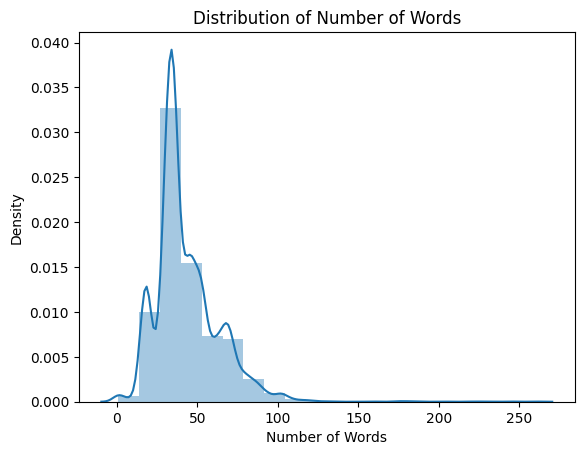

In [ ]:
ax = sns.distplot(df['text_length'], norm_hist = True, bins = 20)
plt.title(f'Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.show()

In [ ]:
print("Average Text: ", int(np.mean(df['text_length'])), " Number of words")
print("Longest Text: ", max(df['text_length']), " Number of words")
print("Shortest Text: ", min(df['text_length']), " Number of word.")

Average Text:  43  Number of words
Longest Text:  260  Number of words
Shortest Text:  1  Number of word.


In [ ]:
df[df['text_length']==1]

,ROW_ID,FOI_TEXT,PRIMARY_LABEL,text_length
618,3265893,(B)(4),Stakeholder Unassigned,1
1342,2183359,(B)(4),Stakeholder Unassigned,1
1653,1937352,COM-(B)(4).,Quality Engineering,1
2827,1940488,COM-(B)(4).,Stakeholder Unassigned,1
2931,2040371,COM-(B)(4).,Stakeholder Unassigned,1
3010,3240092,COM-(B)(4).,Stakeholder Unassigned,1
3020,2937457,COM-(B)(4).,Stakeholder Unassigned,1
3042,3456855,COM-(B)(4).,Stakeholder Unassigned,1
3078,2936782,COM-(B)(4).,Stakeholder Unassigned,1
3171,3430034,(B(4).,Stakeholder Unassigned,1


In [ ]:
# !pip install WordCloud

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Average POSITIVE Review Stopword Ratio:	 0.39


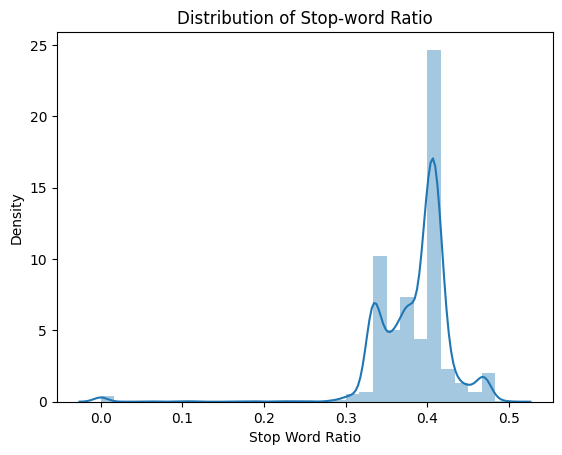

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
    
# function to calculate the stop words raion  
def stop_words_ratio(x):
    num_total_words = 0
    num_stop_words = 0
    for word in word_tokenize(x):
        if word.lower() in stop_words:
            num_stop_words += 1
        num_total_words += 1 
    return num_stop_words/num_total_words


stopwords = df.FOI_TEXT.apply(stop_words_ratio)


# plotting the distribution 
sns.distplot(stopwords, norm_hist = True, bins=30)
print("Average POSITIVE Review Stopword Ratio:\t", round(stopwords.values.mean(),2))
plt.title('Distribution of Stop-word Ratio')
plt.xlabel('Stop Word Ratio')
plt.show()

In [ ]:
# importing the NLP libraries that will be used for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

from nltk.stem import PorterStemmer
ps = PorterStemmer() #creating an instance of the class

stopwords.words("english")[:10] # <-- import the english stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def preprocess_text(text):
    """In preprocess_text function we will apply all the things that given below:
    - removing links
    - removing special characters
    - removing punctuations
    - removing numbers
    - removing stopwords
    - doing stemming
    - transforming in lowercase
    - removing excessive whitespaces
    """
    # remove links
    text = re.sub(r"http\S+", "", str(text))
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", str(text))
    # remove punctuations in string
    text = re.sub(r'[^\w\s]', "", str(text)) 
    # 1. tokenize
    tokens = nltk.word_tokenize(text)
    # 2. check if stopword and stemming the word
    tokens = [ps.stem(w) for w in tokens if not w.lower() in stopwords.words("english")]
    # 3. join back together
    text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [ ]:
df['clean_text'] = df['FOI_TEXT'].apply(lambda x: preprocess_text(x))
df.head()

,ROW_ID,FOI_TEXT,PRIMARY_LABEL,text_length,clean_text
0,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,Quality Engineering,32,report transmitt lost connect pump greater hou...
1,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,37,report signal loss one hour occur product data...
2,2609625,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,Quality Engineering,31,report transmitt fail error occur data evalu a...
3,2813837,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,45,report signal loss one hour occur review share...
4,1337517,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,52,report signal loss one hour occur product eval...


In [ ]:
# define a function for getting all words from the text
def returning_tokinize_list(df,column_name):
    df = df.reset_index(drop=True)  
    tokenize_list = [word_tokenize(df[column_name][i]) for i in range(df.shape[0])]
    final = [j for i in tokenize_list for j in i]
    return final     

In [ ]:
# get the all words of text into list
tokenize_list_words= returning_tokinize_list(df, 'clean_text')

In [ ]:
# function for words in dataframe format
def table_format(data_list,column_name):
    df_ = pd.DataFrame(data_list, columns = [column_name,'Frequency_distribution'])
    return df_

# function for extracting the most common words in reviews text
def most_common_words(cleaned_col_name_list,common_words = 10):
    fdist = FreqDist(cleaned_col_name_list)
    most_common=fdist.most_common(common_words)
    return most_common

In [ ]:
# draw a graph of word which are most common
def word_cloud(data):
    unique_string=(" ").join(data)
    wordcloud = WordCloud(width = 1000, height = 500,background_color = "white").generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("wordCloud"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

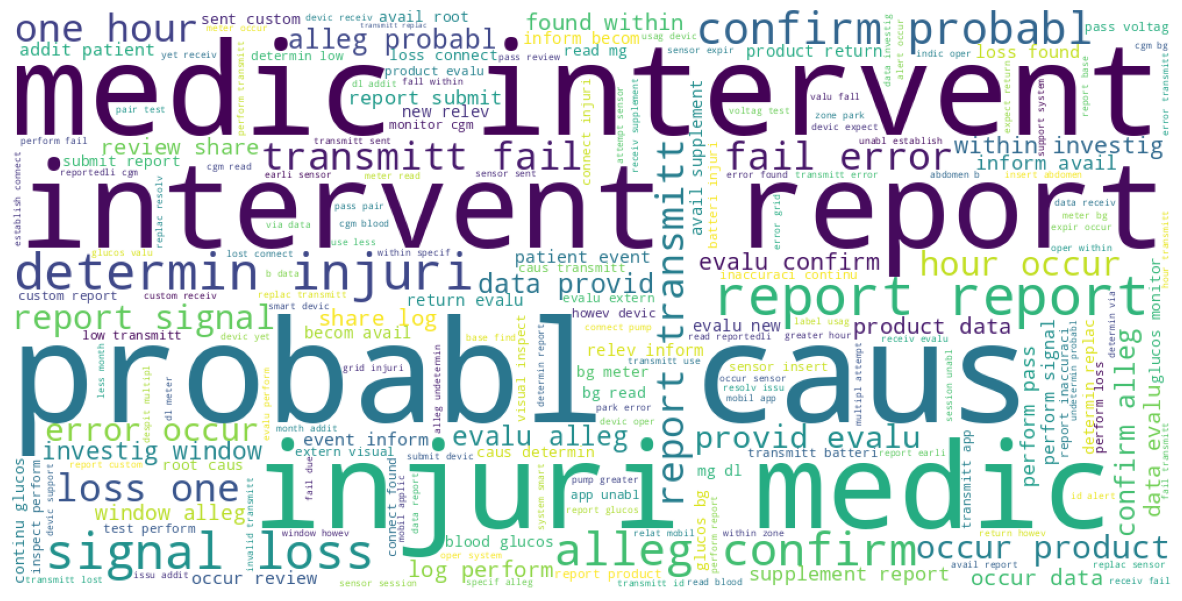

In [ ]:
# draw word cloud
word_cloud(tokenize_list_words)

In [ ]:
# lets try to check the 15 most common words
MCW = most_common_words(tokenize_list_words, common_words=15)
table_format(MCW, 'word')

,word,Frequency_distribution
0,report,10166
1,caus,4531
2,determin,4241
3,alleg,4002
4,probabl,3963
5,occur,3962
6,medic,3931
7,intervent,3922
8,injuri,3917
9,evalu,3906


In [ ]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.feature_extraction.text import TfidfVectorizer
import time

In [ ]:
label_enc = LabelEncoder()
df['PRIMARY_LABEL_ENC'] = label_enc.fit_transform(df['PRIMARY_LABEL'] )

In [ ]:
label_enc.classes_

array(['Design Engineer', 'Management', 'Manufacturing Engineer',
       'Quality Engineering', 'Stakeholder Unassigned'], dtype=object)

In [ ]:
X = df['clean_text'] # independent feature
y = df['PRIMARY_LABEL_ENC'] # dependent feature

In [ ]:
# split data into 75% training and 25% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [ ]:
print("Training Shape: ", X_train.shape)
print("Testing Shape: ", X_test.shape)

Training Shape:  (4269,)
Testing Shape:  (1423,)


In [ ]:
print(y_train.value_counts())
print()
print(y_test.value_counts())

3    2516
4    1262
1     413
2      44
0      34
Name: PRIMARY_LABEL_ENC, dtype: int64

3    839
4    421
1    137
2     15
0     11
Name: PRIMARY_LABEL_ENC, dtype: int64


In [ ]:
# Fit and transform the data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train.values)
X_test_tfidf = tfidf.transform(X_test.values)
print ("Number of features TF-IDF: %d" %len(tfidf.get_feature_names_out()))

Number of features TF-IDF: 405


In [ ]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

In [ ]:
def results(model, y_pred, y_test):
    accuracy = round(accuracy_score(y_pred, y_test)*100,4)
    precision = round(precision_score(y_pred, y_test, average='macro')*100,4) 
    recall = round(recall_score(y_pred, y_test, average='macro')*100,4)   
    f1_scr = round(f1_score(y_pred, y_test, average='macro')*100,4)
    
    
    print("\nAccuracy: {}%".format(accuracy))  
    print("Precision: {}%".format(precision))    
    print("Recall: {}%".format(recall))    
    print("F1-Score: {}%".format(f1_scr)) 
    print()
    print("Classification Report:")
    print(classification_report(y_pred, y_test, target_names=label_enc.classes_))
    print()
    print("Confusion Matrix:")
    fig, ax = plt.subplots(figsize=(5,5))
    ConfusionMatrixDisplay.from_predictions(y_pred, y_test, 
                                            ax=ax,
                                            display_labels=label_enc.classes_,
                                            xticks_rotation='vertical')
    plt.show()
    
    return {
        'Model':model_best_params.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1_scr
    }

In [ ]:
def hyperparameters(model, params:dict):
  # Perform Grid Search with cross-validation
  grid_search = GridSearchCV(model, param_grid, cv=5)
  grid_search.fit(X_train_tfidf, y_train)

  # Print the best hyperparameters
  best_params = grid_search.best_params_
  print("Best Hyperparameters: ", best_params)
  print("Best Score: ", grid_search.best_score_)
  best_estimatore = grid_search.best_estimator_

  return best_estimatore

## **LogisticRegression**

In [ ]:
# Define the model and the hyperparameters to be tuned
model = LogisticRegression()

param_grid = {
    'penalty': ['11', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear'],
    'multi_class': ['ovr'],
    'random_state': [42],
}

model_best_params = hyperparameters(model, param_grid)
print()
model_best_params

Best Hyperparameters:  {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Best Score:  0.8360254893185918



LogisticRegression(C=10, multi_class='ovr', random_state=42, solver='liblinear')

Training time: 0.160 seconds

Accuracy: 84.3992%
Precision: 47.2313%
Recall: 58.8603%
F1-Score: 49.3006%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       0.36      0.50      0.42         8
            Management       0.17      0.72      0.27        32
Manufacturing Engineer       0.00      0.00      0.00         0
   Quality Engineering       0.97      0.83      0.89       976
Stakeholder Unassigned       0.86      0.89      0.88       407

              accuracy                           0.84      1423
             macro avg       0.47      0.59      0.49      1423
          weighted avg       0.92      0.84      0.87      1423


Confusion Matrix:


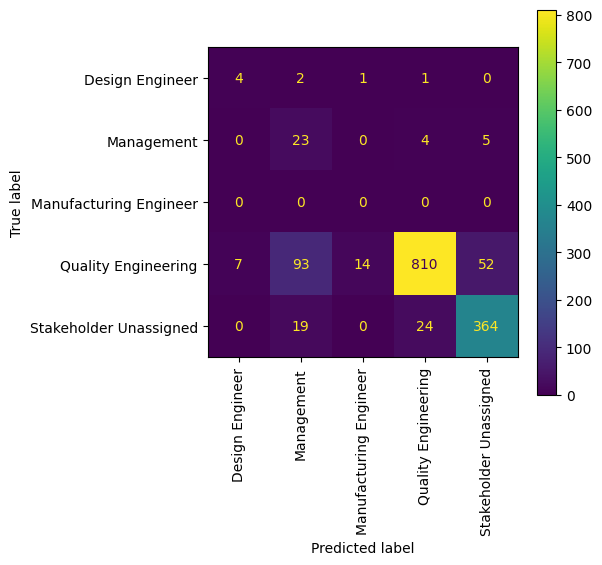

In [ ]:
# Record the start time
start_time = time.time()

# Fit the model on the training data
model_best_params.fit(X_train_tfidf, y_train)

# Record the end time
end_time = time.time()

# Compute the training time in seconds
training_time = end_time - start_time
print(f"Training time: {training_time:.3f} seconds")

# predict the model on testing data
y_pred = model_best_params.predict(X_test_tfidf)

# get results 
RESULTS_LR = results(model_best_params, y_pred, y_test)

# Add the training time to RESULTS_LR
RESULTS_LR['Training time (s)'] = training_time

In [ ]:
def get_model_results(res):
  # Convert the dictionary to a DataFrame
  return pd.DataFrame.from_dict([res]).set_index('Model')

In [ ]:
df_results_lr = get_model_results(RESULTS_LR)
df_results_lr

,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
LogisticRegression,84.3992,47.2313,58.8603,49.3006,0.160048


In [ ]:
def check_cross_validation_score(fold_list, model):
    RES = []
    for cv in fold_list:
        cv_results = cross_validate(model, X_test_tfidf, y_test, cv=cv, return_train_score=True)
        # Print the average test score and average training score across all folds
        print(f"Fold-{cv}\t\tAverage train score: {cv_results['train_score'].mean():.3f} - Average test score: {cv_results['test_score'].mean():.3f}")
        RES.append((f"{model_best_params.__class__.__name__}-Fold-{cv}",cv_results['train_score'].mean(), cv_results['test_score'].mean()))
    return RES

In [ ]:
# Define the cross validation list
cross_validation = [5, 10, 15, 20]
RES = check_cross_validation_score(cross_validation, model_best_params)

Fold-5		Average train score: 0.861 - Average test score: 0.841
Fold-10		Average train score: 0.859 - Average test score: 0.837
Fold-15		Average train score: 0.859 - Average test score: 0.841
Fold-20		Average train score: 0.859 - Average test score: 0.836


In [ ]:
def get_cv_results(res):
  return pd.DataFrame(res, columns=['cross-validation', 'train_score', 'test_score'])

In [ ]:
df_results_cv_lr = get_cv_results(RES)
df_results_cv_lr

,cross-validation,train_score,test_score
0,LogisticRegression-Fold-5,0.860681,0.841166
1,LogisticRegression-Fold-10,0.859452,0.836994
2,LogisticRegression-Fold-15,0.858749,0.840515
3,LogisticRegression-Fold-20,0.858860,0.836268


## **GaussianNB**

In [ ]:
# Define the model and the hyperparameters to be tuned
model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    # 'random_state': [42],
}

model_best_params = hyperparameters(model, param_grid)
print()
model_best_params

Best Hyperparameters:  {'var_smoothing': 1e-05}
Best Score:  0.3368485933377444



GaussianNB(var_smoothing=1e-05)

Training time: 0.017 seconds

Accuracy: 31.9044%
Precision: 57.5455%
Recall: 38.3726%
F1-Score: 28.4934%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       0.82      0.02      0.05       382
            Management       0.39      0.30      0.34       175
Manufacturing Engineer       0.87      0.03      0.06       421
   Quality Engineering       0.10      0.61      0.16       132
Stakeholder Unassigned       0.71      0.96      0.81       313

              accuracy                           0.32      1423
             macro avg       0.58      0.38      0.28      1423
          weighted avg       0.69      0.32      0.27      1423


Confusion Matrix:


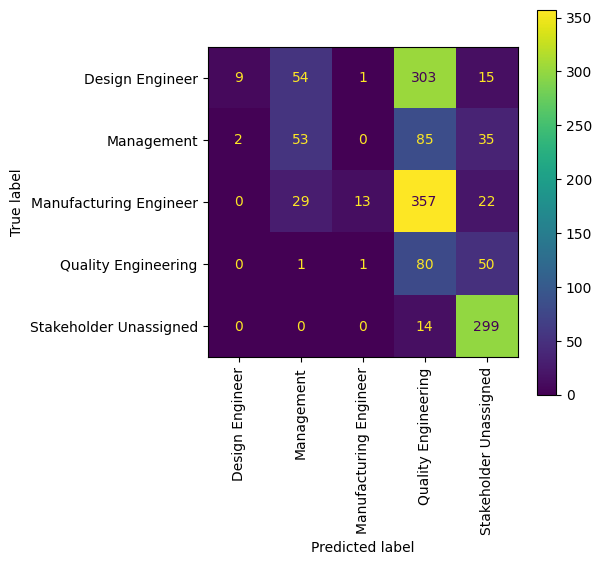

In [ ]:
# Record the start time
start_time = time.time()

# Fit the model on the training data
model_best_params.fit(X_train_tfidf, y_train)

# Record the end time
end_time = time.time()

# Compute the training time in seconds
training_time = end_time - start_time
print(f"Training time: {training_time:.3f} seconds")

# predict the model on testing data
y_pred = model_best_params.predict(X_test_tfidf)

# get results 
RESULTS_GNB = results(model_best_params, y_pred, y_test)

# Add the training time to RESULTS_LR
RESULTS_GNB['Training time (s)'] = training_time

In [ ]:
df_results_gnb = get_model_results(RESULTS_GNB)
df_results_gnb

,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
GaussianNB,31.9044,57.5455,38.3726,28.4934,0.01676


In [ ]:
RES = check_cross_validation_score(cross_validation, model_best_params)
df_results_cv_gnb = get_cv_results(RES)

Fold-5		Average train score: 0.457 - Average test score: 0.431
Fold-10		Average train score: 0.450 - Average test score: 0.427
Fold-15		Average train score: 0.448 - Average test score: 0.424
Fold-20		Average train score: 0.447 - Average test score: 0.424


In [ ]:
df_results_cv_gnb

,cross-validation,train_score,test_score
0,GaussianNB-Fold-5,0.457305,0.431480
1,GaussianNB-Fold-10,0.449910,0.427312
2,GaussianNB-Fold-15,0.448047,0.424464
3,GaussianNB-Fold-20,0.446869,0.423728


## **RandomForestClassifier**

In [ ]:
# Define the model and the hyperparameters to be tuned
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
    'random_state': [42],
}

model_best_params = hyperparameters(model, param_grid)
print()
model_best_params

Best Hyperparameters:  {'bootstrap': False, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42}
Best Score:  0.84422413248735



RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       random_state=42)

Training time: 0.710 seconds

Accuracy: 84.8208%
Precision: 51.9572%
Recall: 74.6591%
F1-Score: 55.6023%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       0.55      0.75      0.63         8
            Management       0.15      0.75      0.25        28
Manufacturing Engineer       0.07      0.50      0.12         2
   Quality Engineering       0.97      0.83      0.90       985
Stakeholder Unassigned       0.86      0.90      0.88       400

              accuracy                           0.85      1423
             macro avg       0.52      0.75      0.56      1423
          weighted avg       0.92      0.85      0.88      1423


Confusion Matrix:


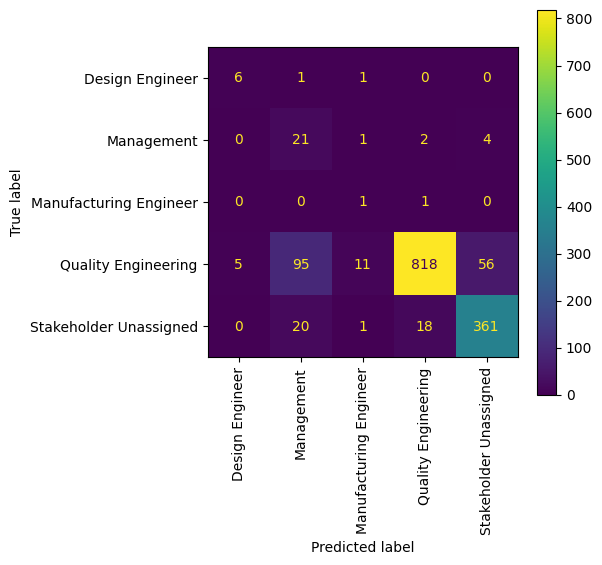

In [ ]:
# Record the start time
start_time = time.time()

# Fit the model on the training data
model_best_params.fit(X_train_tfidf, y_train)

# Record the end time
end_time = time.time()

# Compute the training time in seconds
training_time = end_time - start_time
print(f"Training time: {training_time:.3f} seconds")

# predict the model on testing data
y_pred = model_best_params.predict(X_test_tfidf)

# get results 
RESULTS_RF = results(model_best_params, y_pred, y_test)

# Add the training time to RESULTS_LR
RESULTS_RF['Training time (s)'] = training_time

In [ ]:
df_results_rf = get_model_results(RESULTS_RF)
df_results_rf

,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
RandomForestClassifier,84.8208,51.9572,74.6591,55.6023,0.70987


In [ ]:
RES = check_cross_validation_score(cross_validation, model_best_params)
df_results_cv_rf = get_cv_results(RES)

Fold-5		Average train score: 0.872 - Average test score: 0.838
Fold-10		Average train score: 0.872 - Average test score: 0.835
Fold-15		Average train score: 0.871 - Average test score: 0.838
Fold-20		Average train score: 0.871 - Average test score: 0.836


In [ ]:
df_results_cv_rf

,cross-validation,train_score,test_score
0,RandomForestClassifier-Fold-5,0.872452,0.837660
1,RandomForestClassifier-Fold-10,0.871711,0.834891
2,RandomForestClassifier-Fold-15,0.870645,0.838395
3,RandomForestClassifier-Fold-20,0.870622,0.836258


## **Support Vector Machine**

In [ ]:
# Define the model and the hyperparameters to be tuned
model = SVC()

param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'decision_function_shape': ['ovr'],
    'random_state': [42],
}

model_best_params = hyperparameters(model, param_grid)
print()
model_best_params

Best Hyperparameters:  {'C': 10, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 42}
Best Score:  0.8407101537211276



SVC(C=10, random_state=42)

Training time: 1.336 seconds

Accuracy: 83.9072%
Precision: 53.8355%
Recall: 69.0392%
F1-Score: 55.8351%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       0.64      0.64      0.64        11
            Management       0.18      0.60      0.28        42
Manufacturing Engineer       0.07      0.50      0.12         2
   Quality Engineering       0.96      0.83      0.89       966
Stakeholder Unassigned       0.85      0.89      0.87       402

              accuracy                           0.84      1423
             macro avg       0.54      0.69      0.56      1423
          weighted avg       0.90      0.84      0.86      1423


Confusion Matrix:


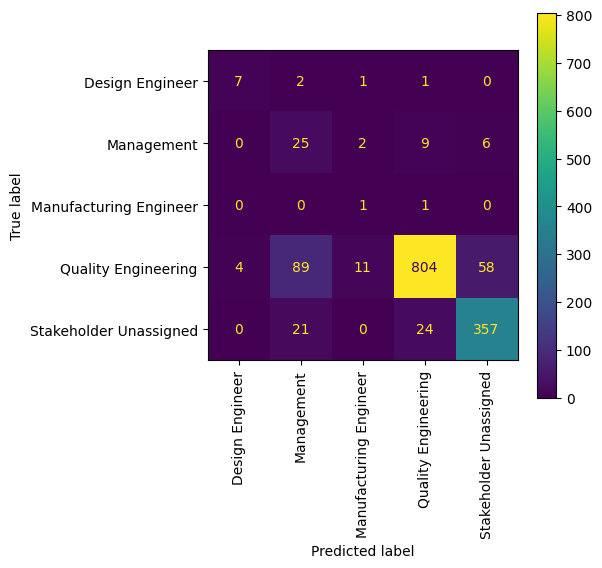

In [ ]:
# Record the start time
start_time = time.time()

# Fit the model on the training data
model_best_params.fit(X_train_tfidf, y_train)

# Record the end time
end_time = time.time()

# Compute the training time in seconds
training_time = end_time - start_time
print(f"Training time: {training_time:.3f} seconds")

# predict the model on testing data
y_pred = model_best_params.predict(X_test_tfidf)

# get results 
RESULTS_SVM = results(model_best_params, y_pred, y_test)

# Add the training time to RESULTS_LR
RESULTS_SVM['Training time (s)'] = training_time

In [ ]:
df_results_svm = get_model_results(RESULTS_SVM)
df_results_svm

,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
SVC,83.9072,53.8355,69.0392,55.8351,1.336157


In [ ]:
RES = check_cross_validation_score(cross_validation, model_best_params)
df_results_cv_svm = get_cv_results(RES)

Fold-5		Average train score: 0.884 - Average test score: 0.841
Fold-10		Average train score: 0.883 - Average test score: 0.837
Fold-15		Average train score: 0.883 - Average test score: 0.836
Fold-20		Average train score: 0.883 - Average test score: 0.834


In [ ]:
df_results_cv_svm

,cross-validation,train_score,test_score
0,SVC-Fold-5,0.883696,0.841176
1,SVC-Fold-10,0.882955,0.836989
2,SVC-Fold-15,0.882693,0.836275
3,SVC-Fold-20,0.882568,0.834135


## **AdaBoost**

In [ ]:
# Define the model and the hyperparameters to be tuned
model = AdaBoostClassifier()

param_grid = {
    'base_estimator': [DecisionTreeClassifier(max_depth=1),
                       DecisionTreeClassifier(max_depth=3),
                       DecisionTreeClassifier(max_depth=5)],
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.1, 1],
    'random_state': [42],
}

model_best_params = hyperparameters(model, param_grid)
print()
model_best_params

Best Hyperparameters:  {'base_estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 42}
Best Score:  0.8343820267906905



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.01, n_estimators=100, random_state=42)

Training time: 5.111 seconds

Accuracy: 83.9072%
Precision: 46.3864%
Recall: 67.7151%
F1-Score: 50.57%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       0.27      0.75      0.40         4
            Management       0.16      0.58      0.25        38
Manufacturing Engineer       0.07      0.33      0.11         3
   Quality Engineering       0.96      0.83      0.89       975
Stakeholder Unassigned       0.86      0.90      0.88       403

              accuracy                           0.84      1423
             macro avg       0.46      0.68      0.51      1423
          weighted avg       0.91      0.84      0.87      1423


Confusion Matrix:


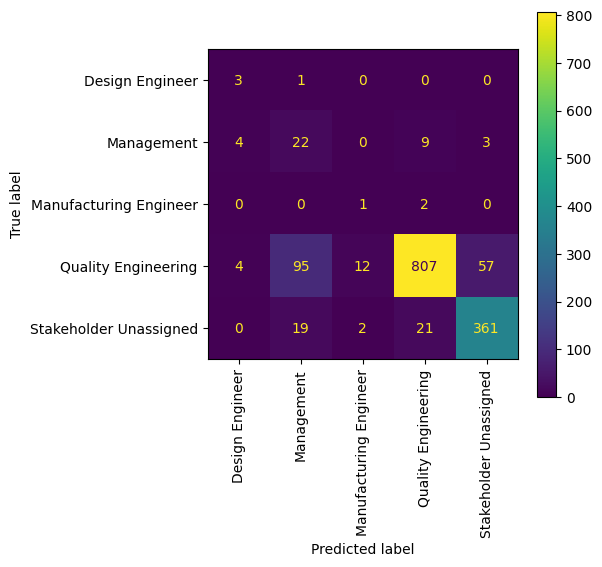

In [ ]:
# Record the start time
start_time = time.time()

# Fit the model on the training data
model_best_params.fit(X_train_tfidf, y_train)

# Record the end time
end_time = time.time()

# Compute the training time in seconds
training_time = end_time - start_time
print(f"Training time: {training_time:.3f} seconds")

# predict the model on testing data
y_pred = model_best_params.predict(X_test_tfidf)

# get results 
RESULTS_ADA = results(model_best_params, y_pred, y_test)

# Add the training time to RESULTS_LR
RESULTS_ADA['Training time (s)'] = training_time

In [ ]:
df_results_ada = get_model_results(RESULTS_ADA)
df_results_ada

,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
AdaBoostClassifier,83.9072,46.3864,67.7151,50.57,5.110678


In [ ]:
RES = check_cross_validation_score(cross_validation, model_best_params)
df_results_cv_ada = get_cv_results(RES)

Fold-5		Average train score: 0.881 - Average test score: 0.825
Fold-10		Average train score: 0.878 - Average test score: 0.816
Fold-15		Average train score: 0.879 - Average test score: 0.829
Fold-20		Average train score: 0.880 - Average test score: 0.830


In [ ]:
df_results_cv_ada

,cross-validation,train_score,test_score
0,AdaBoostClassifier-Fold-5,0.881237,0.825019
1,AdaBoostClassifier-Fold-10,0.878427,0.815887
2,AdaBoostClassifier-Fold-15,0.878778,0.828555
3,AdaBoostClassifier-Fold-20,0.880275,0.829920


## **XG Boost**

In [ ]:
# Define the model and the hyperparameters to be tuned
model = xgb.XGBClassifier()

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [5, 10, 15, 20],
    'n_estimators': [100, 200, 500, 1000],
    'objective': ['multi:softmax'],
    'num_class': [5],
    'random_state': [42],
}

model_best_params = hyperparameters(model, param_grid)
print()
model_best_params

Best Hyperparameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_class': 5, 'objective': 'multi:softmax', 'random_state': 42}
Best Score:  0.844927257701843



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

Training time: 2.009 seconds

Accuracy: 84.61%
Precision: 55.2338%
Recall: 70.6183%
F1-Score: 57.7894%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       0.64      0.64      0.64        11
            Management       0.17      0.66      0.27        35
Manufacturing Engineer       0.13      0.50      0.21         4
   Quality Engineering       0.97      0.83      0.89       974
Stakeholder Unassigned       0.86      0.90      0.88       399

              accuracy                           0.85      1423
             macro avg       0.55      0.71      0.58      1423
          weighted avg       0.91      0.85      0.87      1423


Confusion Matrix:


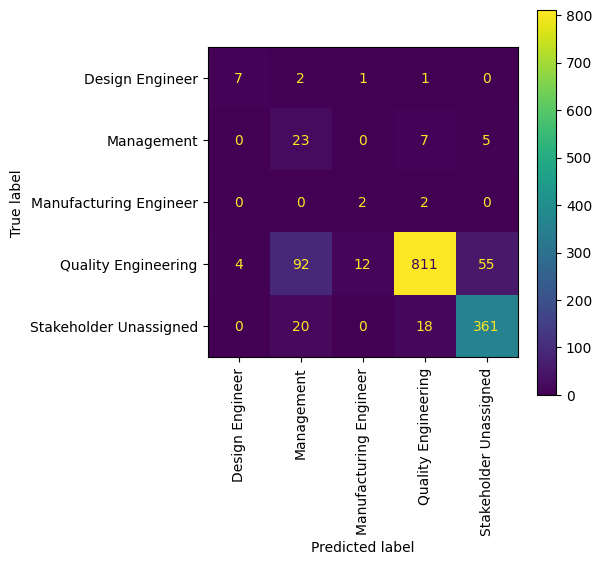

In [ ]:
# Record the start time
start_time = time.time()

# Fit the model on the training data
model_best_params.fit(X_train_tfidf, y_train)

# Record the end time
end_time = time.time()

# Compute the training time in seconds
training_time = end_time - start_time
print(f"Training time: {training_time:.3f} seconds")

# predict the model on testing data
y_pred = model_best_params.predict(X_test_tfidf)

# get results 
RESULTS_XGB = results(model_best_params, y_pred, y_test)

# Add the training time to RESULTS_LR
RESULTS_XGB['Training time (s)'] = training_time

In [ ]:
df_results_xgb = get_model_results(RESULTS_XGB)
df_results_xgb

,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
XGBClassifier,84.61,55.2338,70.6183,57.7894,2.009058


In [ ]:
RES = check_cross_validation_score(cross_validation, model_best_params)
df_results_cv_xgb = get_cv_results(RES)

Fold-5		Average train score: 0.887 - Average test score: 0.836
Fold-10		Average train score: 0.886 - Average test score: 0.836
Fold-15		Average train score: 0.886 - Average test score: 0.834
Fold-20		Average train score: 0.886 - Average test score: 0.833


In [ ]:
df_results_cv_xgb

,cross-validation,train_score,test_score
0,XGBClassifier-Fold-5,0.887209,0.836264
1,XGBClassifier-Fold-10,0.886156,0.835581
2,XGBClassifier-Fold-15,0.885905,0.834169
3,XGBClassifier-Fold-20,0.885712,0.833451


## **SGD**

In [ ]:
# Define the model and the hyperparameters to be tuned
model = SGDClassifier()

param_grid = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
    'penalty': ['11', '12', 'elasticnet'],
    'random_state': [42],
}

model_best_params = hyperparameters(model, param_grid)
print()
model_best_params

Best Hyperparameters:  {'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'elasticnet', 'random_state': 42}
Best Score:  0.8357904736279999



SGDClassifier(loss='modified_huber', penalty='elasticnet', random_state=42)

Training time: 1.722 seconds

Accuracy: 83.9775%
Precision: 46.6034%
Recall: 59.7271%
F1-Score: 48.5764%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       0.36      0.50      0.42         8
            Management       0.15      0.77      0.25        26
Manufacturing Engineer       0.00      0.00      0.00         0
   Quality Engineering       0.97      0.82      0.89       988
Stakeholder Unassigned       0.85      0.90      0.87       401

              accuracy                           0.84      1423
             macro avg       0.47      0.60      0.49      1423
          weighted avg       0.92      0.84      0.87      1423


Confusion Matrix:


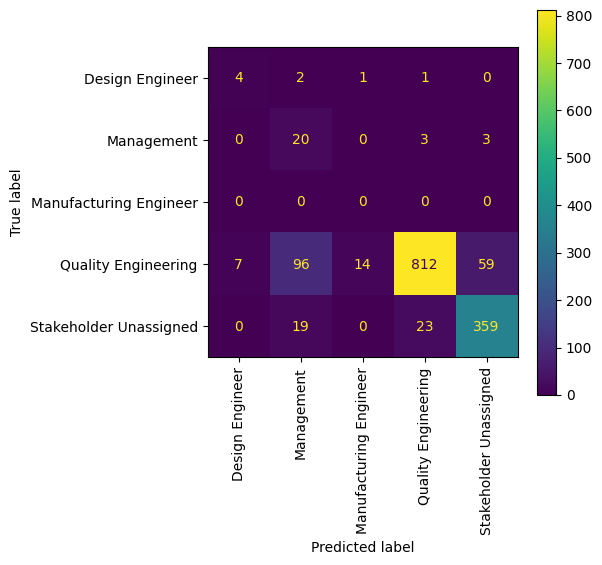

In [ ]:
# Record the start time
start_time = time.time()

# Fit the model on the training data
model_best_params.fit(X_train_tfidf, y_train)

# Record the end time
end_time = time.time()

# Compute the training time in seconds
training_time = end_time - start_time
print(f"Training time: {training_time:.3f} seconds")

# predict the model on testing data
y_pred = model_best_params.predict(X_test_tfidf)

# get results 
RESULTS_SGD = results(model_best_params, y_pred, y_test)

# Add the training time to RESULTS_LR
RESULTS_SGD['Training time (s)'] = training_time

In [ ]:
df_results_sgd = get_model_results(RESULTS_SGD)
df_results_sgd

,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
SGDClassifier,83.9775,46.6034,59.7271,48.5764,1.721558


In [ ]:
RES = check_cross_validation_score(cross_validation, model_best_params)
df_results_cv_sgd = get_cv_results(RES)

Fold-5		Average train score: 0.863 - Average test score: 0.812
Fold-10		Average train score: 0.840 - Average test score: 0.797
Fold-15		Average train score: 0.856 - Average test score: 0.821
Fold-20		Average train score: 0.867 - Average test score: 0.826


In [ ]:
df_results_cv_sgd

,cross-validation,train_score,test_score
0,SGDClassifier-Fold-5,0.863314,0.811663
1,SGDClassifier-Fold-10,0.839770,0.796957
2,SGDClassifier-Fold-15,0.856087,0.820844
3,SGDClassifier-Fold-20,0.867293,0.825694


## **Models Evaluations**

In [ ]:
df_all_models = pd.concat([df_results_lr, df_results_gnb, 
           df_results_rf, df_results_svm, 
           df_results_ada, df_results_xgb, df_results_sgd])
df_all_models

,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
LogisticRegression,84.3992,47.2313,58.8603,49.3006,0.160048
GaussianNB,31.9044,57.5455,38.3726,28.4934,0.016760
RandomForestClassifier,84.8208,51.9572,74.6591,55.6023,0.709870
SVC,83.9072,53.8355,69.0392,55.8351,1.336157
AdaBoostClassifier,83.9072,46.3864,67.7151,50.5700,5.110678
XGBClassifier,84.6100,55.2338,70.6183,57.7894,2.009058
SGDClassifier,83.9775,46.6034,59.7271,48.5764,1.721558


- XGBClassifier gives better scores as compared to other models. 
- Therefore, we will use as a final model.

In [ ]:
df_all_models_cv = pd.concat([df_results_cv_lr, df_results_cv_gnb, 
           df_results_cv_rf, df_results_cv_svm, 
           df_results_cv_ada, df_results_cv_xgb, df_results_cv_sgd]).set_index("cross-validation")
df_all_models_cv

,train_score,test_score
cross-validation,,
LogisticRegression-Fold-5,0.860681,0.841166
LogisticRegression-Fold-10,0.859452,0.836994
LogisticRegression-Fold-15,0.858749,0.840515
LogisticRegression-Fold-20,0.858860,0.836268
GaussianNB-Fold-5,0.457305,0.431480
GaussianNB-Fold-10,0.449910,0.427312
GaussianNB-Fold-15,0.448047,0.424464
GaussianNB-Fold-20,0.446869,0.423728
RandomForestClassifier-Fold-5,0.872452,0.837660


# **Prediction**

In [ ]:
params = {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_class': 5, 'objective': 'multi:softmax', 'random_state': 42}
model = xgb.XGBClassifier(**params)
model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [ ]:
def prediction(text):
  predict_text = pd.DataFrame([text])
  p = predict_text[0].apply(lambda x: preprocess_text(x)).values
  classes = ['Design Engineer', 'Management', 'Manufacturing Engineer',
       'Quality Engineering', 'Stakeholder Unassigned']
  predict = classes[model.predict(tfidf.transform(p).toarray())[0]]
  print("Predicted Text: ", predict)

In [ ]:
text = "IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR OCCURRED. A REVIEW OF THE SHARE LOGS WAS PERFORMED AND A LOSS OF CONNECTION WAS FOUND WITHIN THE INVESTIGATION WINDOW. HOWEVER, THE DEVICE OPERATED WITHIN SPECIFICATION. THE ALLEGATION WAS NOT CONFIRMED. THE PROBABLE CAUSE COULD NOT BE DETERMINED. NO INJURY OR MEDICAL INTERVENTION WAS REPORTED."

# check prediction
prediction(text)

Predicted Text:  Quality Engineering
